# Data Analysis
##### **“Is London really as rainy as the movies make it out to be?”**

This Data Analysis will investigate:
1. The volume of rain in the cities across both time periods  
By examining the volume of rainfall, it can be determined whether London experiences as much rainfall as is depicted in movies. A higher volume of rain would support this idea. 
2. The number of hours of precipitation in London compared to other countries  
A greater number of precipitation hours could suggest that London's rainfall is as frequent, and therefore 'rainy', as the movies make it out to be. 


In [135]:
import pandas as pd
from lets_plot import *
LetsPlot.setup_html()
from IPython.display import Image


In [112]:
all_data = pd.read_csv('../data/rainfall_data.csv')

## 1. The volume of rain

### Calculating the mean annual rainfall between 2010 and 2020

In [113]:
all_data['Date'] = pd.to_datetime(all_data['Date']) 

# Filtering for 2010 and 2020
rec_rainfall_df = all_data[(all_data['Date'].dt.year >= 2010) & (all_data['Date'].dt.year <= 2020)]

# Calculating annual rainfall
annual_rainfall = rec_rainfall_df.groupby(['City', rec_rainfall_df['Date'].dt.year]).agg(Annual_Rainfall=('Rain Sum', 'sum')).reset_index()

# Renaming column for clarity
annual_rainfall.rename(columns={'Date': 'Year'}, inplace=True)

# Calculate average annual rainfall and renaming column
average_annual_rainfall = annual_rainfall.groupby('City')['Annual_Rainfall'].mean().reset_index()
average_annual_rainfall.rename(columns={'Annual_Rainfall': 'Average_Annual_Rainfall'}, inplace=True)

city_coords = [
    ("London", 51.5072, -0.1276),  
    ("Manchester", 53.4808, -2.2426),  
    ("Edinburgh", 55.9533, -3.1883),
    ("Cork", 51.8985, -8.4756),
    ("Paris", 48.8575, 2.3514),
    ("Rome", 41.8967, 12.4822),
    ("Seattle", 47.6061, -122.3328),    
    ("Bogota", 4.7110, -74.0721),  
    ("Cairo", 30.0444, 31.2357),
    ("Cape Town", -33.9221, 18.4231),
    ("Mumbai", 19.0760, 72.8777)
]

# Converting city_coords to DataFrame
coords_df = pd.DataFrame(city_coords, columns=['City', 'Latitude', 'Longitude'])

# Merging the average annual rainfall DataFrame with city coordinates
merged_rainfall_df = average_annual_rainfall.merge(coords_df)

print(merged_rainfall_df)


          City  Average_Annual_Rainfall  Latitude  Longitude
0       Bogota              1103.236364    4.7110   -74.0721
1        Cairo                24.172727   30.0444    31.2357
2    Cape Town               529.809091  -33.9221    18.4231
3         Cork               942.654545   51.8985    -8.4756
4    Edinburgh               831.218182   55.9533    -3.1883
5       London               660.145455   51.5072    -0.1276
6   Manchester              1034.272727   53.4808    -2.2426
7       Mumbai              2092.990909   19.0760    72.8777
8        Paris               662.209091   48.8575     2.3514
9         Rome               900.027273   41.8967    12.4822
10     Seattle              1272.590909   47.6061  -122.3328


In [165]:
def plot_city_map(city_data, 
                point_colour='blue',
                title="", 
                title_size=16, 
                subtitle="", 
                subtitle_size=14):
                  
    plot = (
        ggplot() +
        geom_livemap() +
        geom_point(aes(x='Longitude', y='Latitude', size='Average_Annual_Rainfall'), 
                   colour=point_colour, 
                   show_legend=True, 
                   data=city_data) +
        ggsize(1000,500) +
        labs(
        title="London's mean annual rainfall between 2010 and 2020 is less than the majority of cities",
        subtitle="London ranks 9th in terms of most annual rainfall out of the chosen cities"
        ) +
        guides(size=guide_legend(title="Average Annual Rainfall (mm)")) +
        theme_minimal() +
        theme(plot_title=element_text(hjust=0.5),
        plot_subtitle=element_text(color='grey', face='italic', hjust=0.5))
        )
    
    return plot

map1 = plot_city_map(merged_rainfall_df, point_colour='#1F627D')
map1





### Calculating the mean daily rainfall for both time periods

In [160]:
# Filtering data for the two time periods
data_1970_1980 = all_data[(all_data['Date'] >= '1970-01-01') & (all_data['Date'] < '1980-01-01')]
data_2010_2020 = all_data[(all_data['Date'] >= '2010-01-01') & (all_data['Date'] < '2020-01-01')]

# Calculating the mean annual rainfall for each city for both periods
mean_rainfall_1970_1980 = data_1970_1980.groupby('City')['Precipitation Sum'].mean().reset_index()
mean_rainfall_2010_2020 = data_2010_2020.groupby('City')['Precipitation Sum'].mean().reset_index()

# Renaming columns and add a 'Time Period' column
mean_rainfall_1970_1980.rename(columns={'Precipitation Sum': 'Mean Rainfall'}, inplace=True)
mean_rainfall_1970_1980['Time Period'] = '1970-1980'

mean_rainfall_2010_2020.rename(columns={'Precipitation Sum': 'Mean Rainfall'}, inplace=True)
mean_rainfall_2010_2020['Time Period'] = '2010-2020'

mean_rainfall_combined = pd.concat([mean_rainfall_1970_1980, mean_rainfall_2010_2020])
print(mean_rainfall_combined)

# Creating a bar chart to show the mean rainfall in each time period in all the cities
dailyrain = (
                ggplot(mean_rainfall_combined, aes(x='City', y='Mean Rainfall', fill='Time Period')) + \
                geom_bar(stat='identity', position='dodge') + \
                labs(title='In both time periods, London has the third lowest average daily rainfall',
                        x='City',
                        y='Daily Mean Rainfall (mm)') + \
                theme_minimal() + \
                scale_fill_manual(values={'1970-1980': '#9EBECF', '2010-2020': '#0875AE'})
)

dailyrain





          City  Mean Rainfall Time Period
0       Bogota       3.480887   1970-1980
1        Cairo       0.078094   1970-1980
2    Cape Town       1.519031   1970-1980
3         Cork       2.256216   1970-1980
4    Edinburgh       1.970071   1970-1980
5       London       1.789540   1970-1980
6   Manchester       2.600219   1970-1980
7       Mumbai       4.787486   1970-1980
8        Paris       1.971276   1970-1980
9         Rome       2.730367   1970-1980
10     Seattle       4.078094   1970-1980
0       Bogota       3.105038   2010-2020
1        Cairo       0.053012   2010-2020
2    Cape Town       1.447645   2010-2020
3         Cork       2.509830   2010-2020
4    Edinburgh       2.350137   2010-2020
5       London       1.824233   2010-2020
6   Manchester       2.852711   2010-2020
7       Mumbai       5.544715   2010-2020
8        Paris       1.871550   2010-2020
9         Rome       2.485706   2010-2020
10     Seattle       3.586008   2010-2020


As illustrated in the first data visualisation, between 2010 and 2020, London's mean annual rainfall was lower than most cities, surpassing only those in Africa. This indicates that, compared to other global cities, London experiences relatively less rainfall and may not be as rainy as commonly depicted in the media. However, when focusing on cities within Europe, the rainfall differences are much smaller, with Paris receiving only 2 more millimeters per year than London. Thus with these small differences, London could still be considered as rainy as the films portray.

The second visualisation reveals that, in both time periods, London ranks above only Cape Town and Cairo in terms of daily mean rainfall. Despite a (slight) increase in daily rainfall between the two periods, London's position in the rankings remains unchanged, reinforcing the idea that London may not be as rainy as seen in movies.

In [161]:
# Saving as image for Github
ggsave(dailyrain, filename='dailyrain.png', path='../figures')

'/files/ds105a-2024-w06-summative-rachel-andrsn/figures/dailyrain.png'

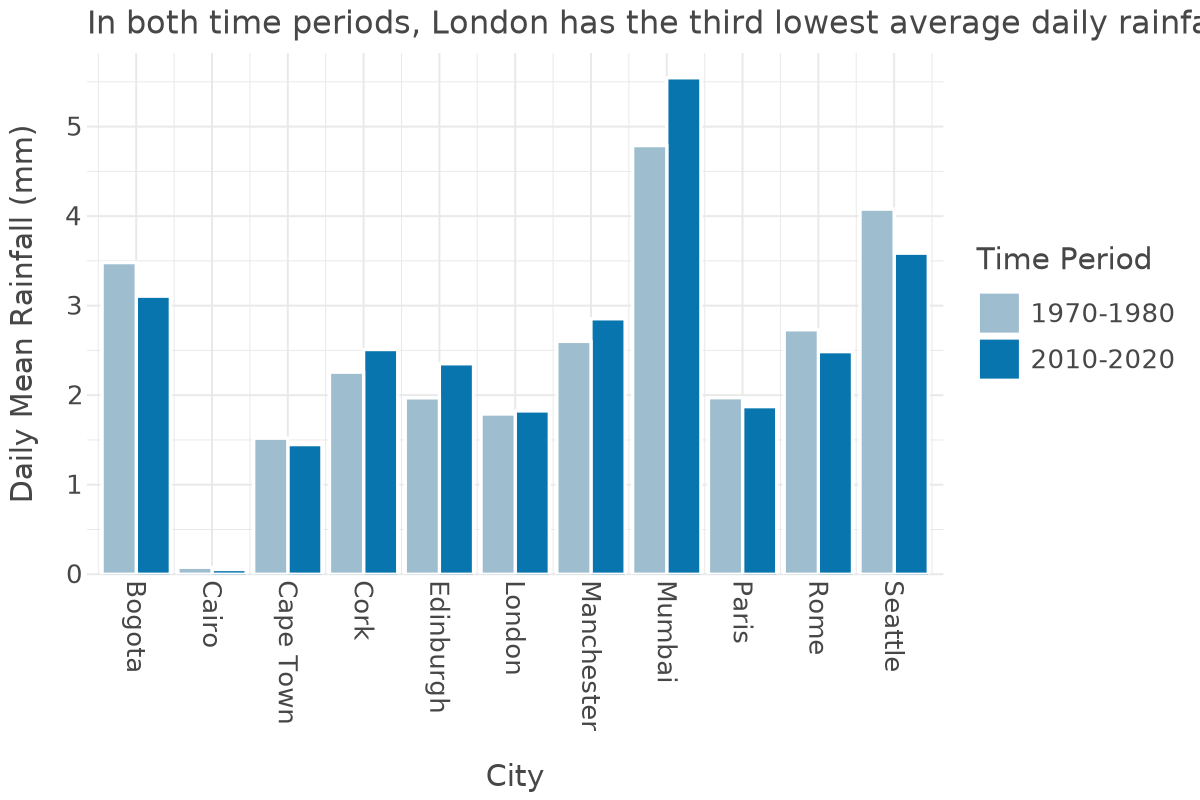

In [162]:
# Loading image for GitHub
Image(filename='../figures/dailyrain.png') 

### Calculating cumulative rainfall in both time periods

In [131]:
# Filtering for the time periods
all_data['Year'] = all_data['Date'].dt.year
rain_1970_1980 = all_data[(all_data['Year'] >= 1970) & (all_data['Year'] <= 1980)]
rain_2010_2020 = all_data[(all_data['Year'] >= 2010) & (all_data['Year'] <= 2020)]

# Calculating cumulative rainfall 
rain_1970_1980_yearly = rain_1970_1980.groupby(['City', 'Year'])['Rain Sum'].sum().reset_index()
rain_1970_1980_yearly['Cumulative_Rain'] = rain_1970_1980_yearly.groupby('City')['Rain Sum'].cumsum()
rain_1970_1980_yearly['Period'] = '1970-1980'

rain_2010_2020_yearly = rain_2010_2020.groupby(['City', 'Year'])['Rain Sum'].sum().reset_index()
rain_2010_2020_yearly['Cumulative_Rain'] = rain_2010_2020_yearly.groupby('City')['Rain Sum'].cumsum()
rain_2010_2020_yearly['Period'] = '2010-2020'

# Combining the two datasets
cum_rain = pd.concat([rain_1970_1980_yearly, rain_2010_2020_yearly])

# Creating line colours
custom_colours = {
    'Bogota': '#8AB58B',  
    'Cairo': '#35B560',  
    'Cape Town': '#114E13',
    'Cork': '#4A685D',
    'Edinburgh': '#04B18C',
    'London': '#FF0004',
    'Manchester': '#BFDCD5',
    'Mumbai': '#0AD4D4',
    'Paris': '#61BBBB',
    'Rome': '#2D5671',
    'Seattle': '#04395C' 
}

# Creating a line graph for each time period (1970-1980 and 2010-2020)
cumcomp = (
        ggplot(data=cum_rain, mapping=aes(x='Year', y='Cumulative_Rain', color='City')) +
        geom_line(size=1) + 
        geom_point(size=0) +    
        ggsize(1300,700) +
        labs(title='London predominantly ranks 3rd lowest in terms of cumulative rainfall',
            subtitle= 'London peaked as the 8th most rainy city between 2012 and 2015',
                x='Year',
                y='Cumulative Rain (mm)') +
        facet_wrap('Period', ncol=2, scales='free_x', dir='v') +
        theme(legend_position='top',
                legend_text=element_text(size=10),
                plot_title=element_text(hjust=0.5), 
                plot_subtitle=element_text(size=14, color='grey', face='italic', hjust=0.5)) +          
        scale_color_manual(values=custom_colours) 
        )

cumcomp

In [133]:
ggsave(cumcomp, filename='Cumulative_rainfall.png', path='figures')

'/files/ds105a-2024-w06-summative-rachel-andrsn/code/figures/Cumulative_rainfall.png'

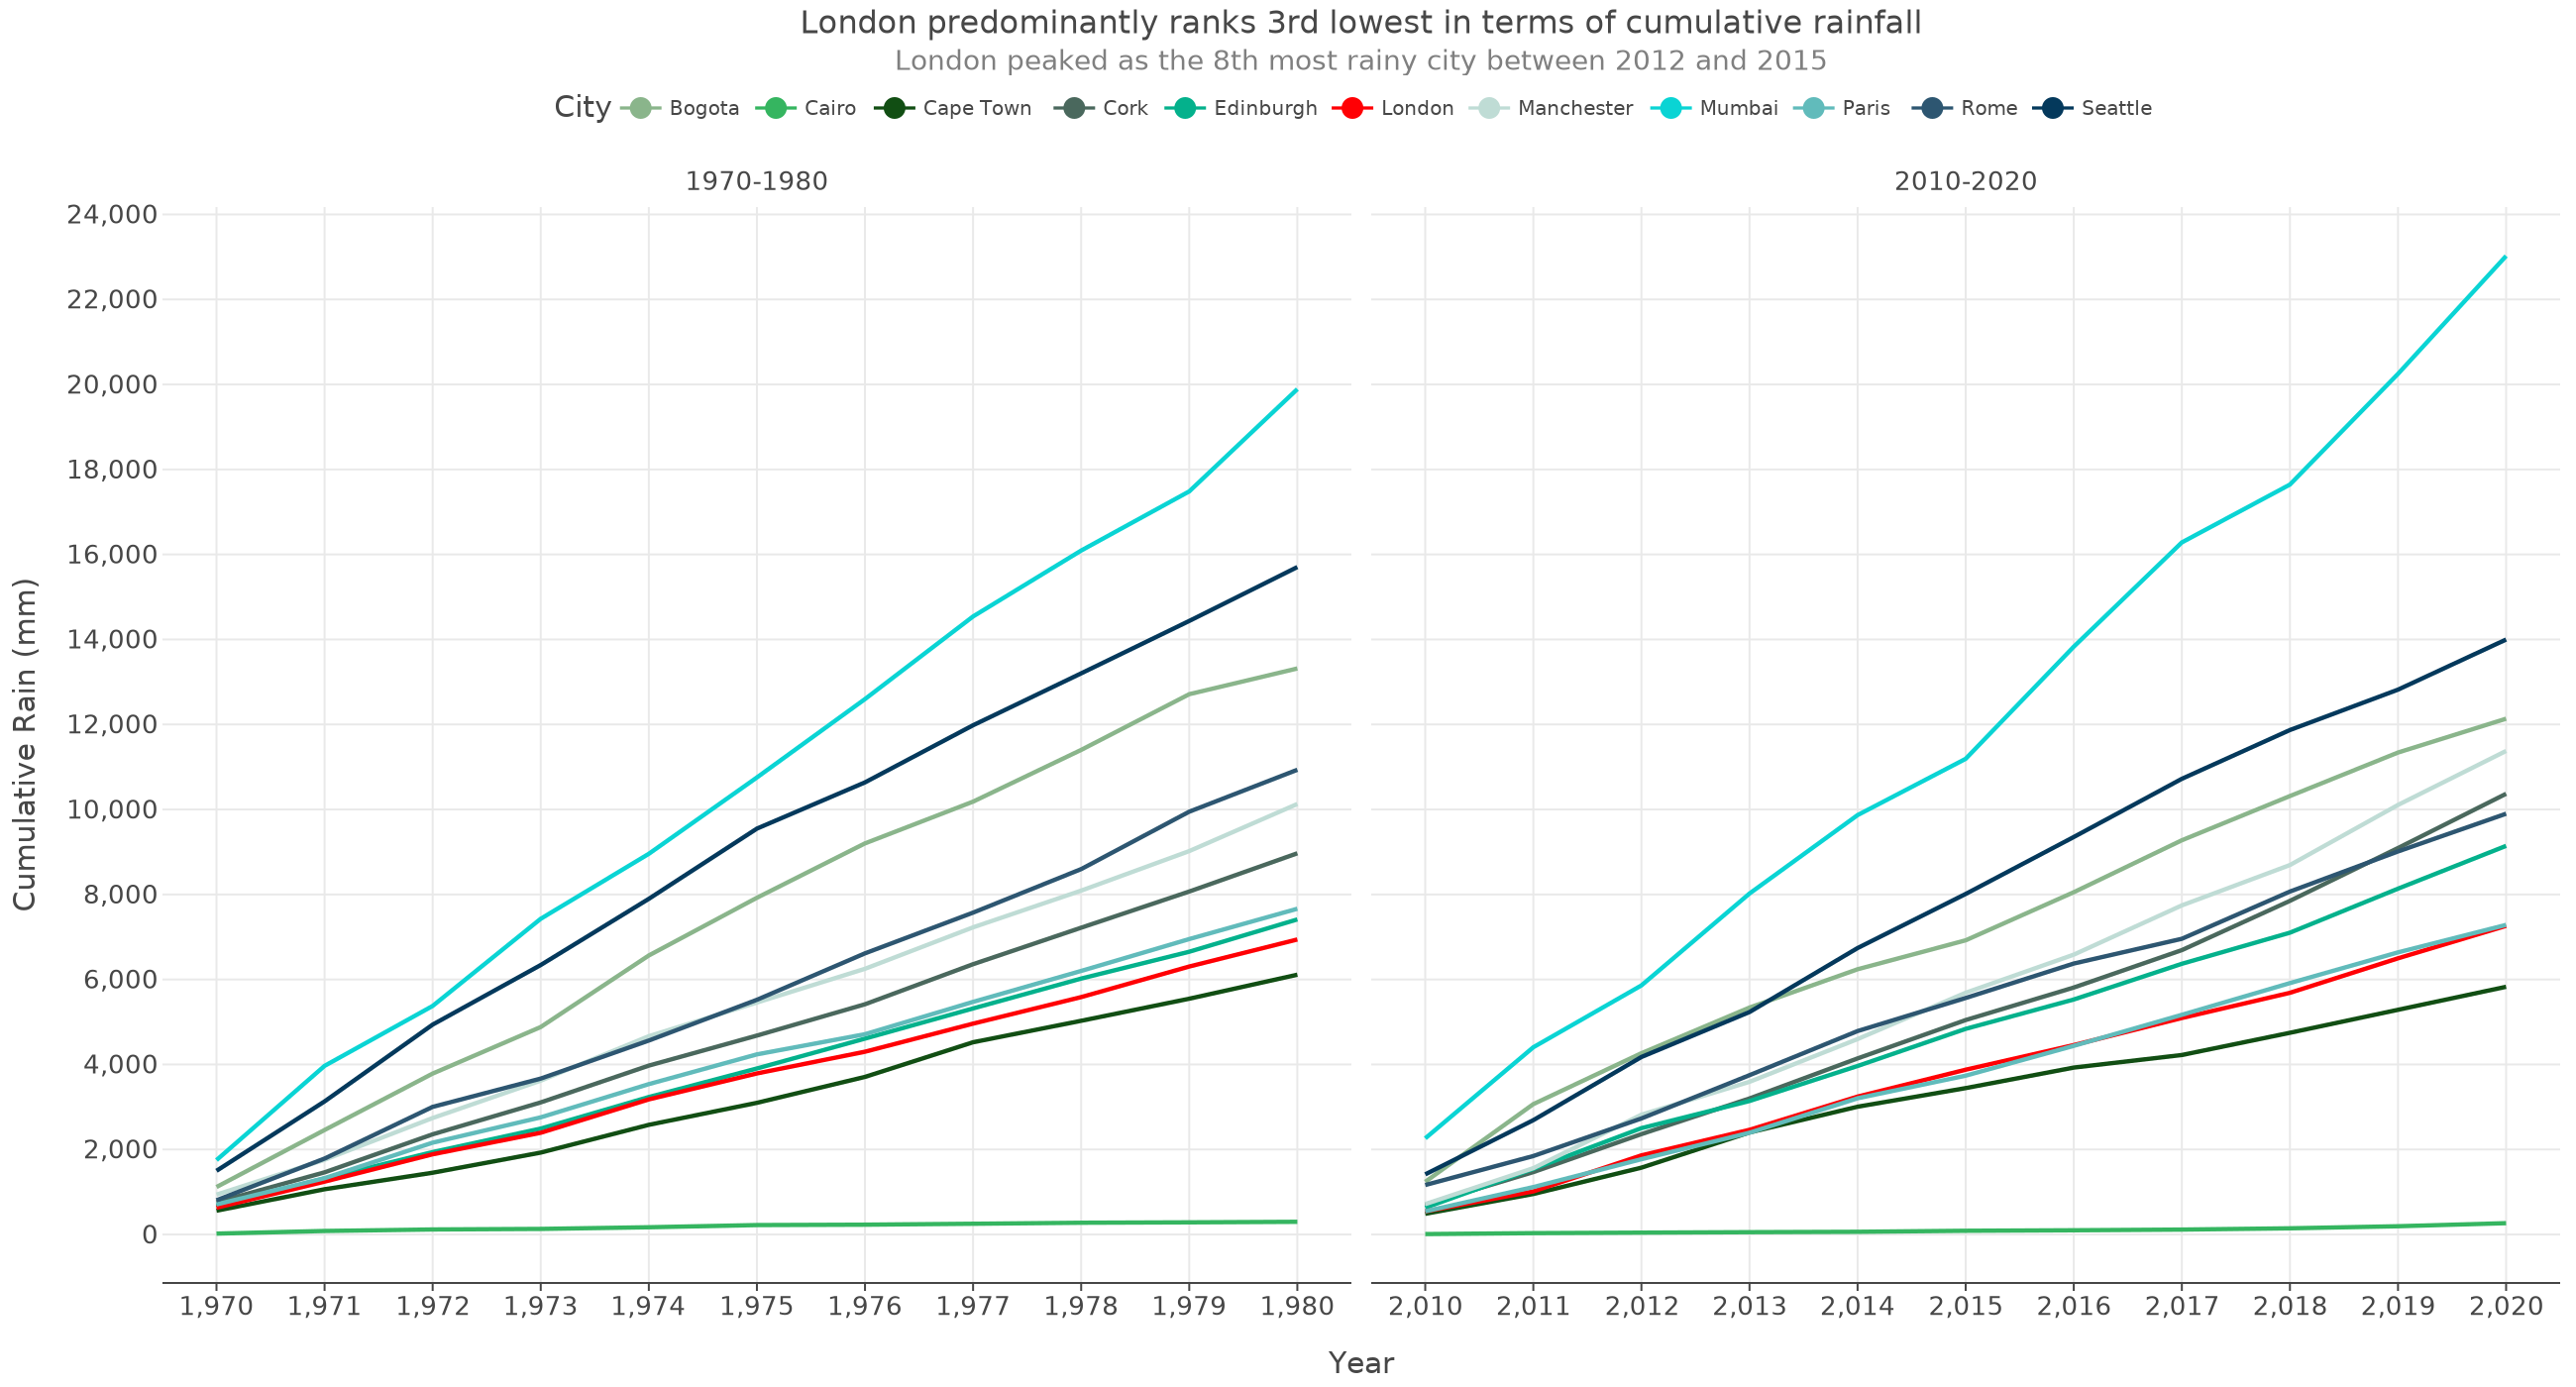

In [139]:
Image(filename='../figures/Cumulative_rainfall.png') 

Throughout the 40 years displayed in the above visualisation, London’s rainfall ranking rose for only a brief period of four years, highlighting its consistently low rainfall levels. This reinforces the idea that London is not as rainy as the movies make it out to be. 

## 2. Hours of precipitation
### Comparing volume of precipitation and volume of rain

In [157]:
# Filtering data for London in 2020
london_2020 = all_data[(all_data['City'] == 'London') & (all_data['Date'].dt.year == 2020)].copy()

# Calculating cumulative sums
london_2020['Cumulative Rain Sum'] = london_2020['Rain Sum'].cumsum()
london_2020['Cumulative Precipitation Sum'] = london_2020['Precipitation Sum'].cumsum()

# Melting the df to create a suitable format for plotting
melted_data = london_2020.melt(id_vars=['Date'], value_vars=['Cumulative Rain Sum', 'Cumulative Precipitation Sum'],
                                var_name='Line_Type', value_name='Cumulative Sum')

# Check formatting
print(melted_data)

# Create a line graph to show the cumulative rain sum and precipitation in London in 2020
precipraingraph = (
                ggplot(melted_data) +
                geom_line(aes(x='Date', y='Cumulative Sum', color='Line_Type'), size=1) +
                ggsize(500, 550) +
                labs(title='The majority of precipitation in London is from rainfall',
                x='Date',
                y='Cumulative Sum of Rain/Precipitation in London (mm)',
                color='Legend') +
                theme(legend_position='top',
                plot_title=element_text(size=16, hjust=0.5)) +
                scale_color_manual(values={'Cumulative Rain Sum': '#5C9CDA', 'Cumulative Precipitation Sum': '#6C658E'})
                )

precipraingraph


          Date                     Line_Type  Cumulative Sum
0   2020-01-01           Cumulative Rain Sum             0.0
1   2020-01-02           Cumulative Rain Sum             0.0
2   2020-01-03           Cumulative Rain Sum             3.1
3   2020-01-04           Cumulative Rain Sum             3.1
4   2020-01-05           Cumulative Rain Sum             3.1
..         ...                           ...             ...
727 2020-12-27  Cumulative Precipitation Sum           764.2
728 2020-12-28  Cumulative Precipitation Sum           764.5
729 2020-12-29  Cumulative Precipitation Sum           764.8
730 2020-12-30  Cumulative Precipitation Sum           764.8
731 2020-12-31  Cumulative Precipitation Sum           764.8

[732 rows x 3 columns]


The above visualisation shows that the large majority of precipitation in the London is rain meaning that the hours of precipitation is a suitable measure to show the frequency of rain seen in London.

In [158]:
ggsave(precipraingraph, filename='preciprain.png', path='../figures')

'/files/ds105a-2024-w06-summative-rachel-andrsn/figures/preciprain.png'

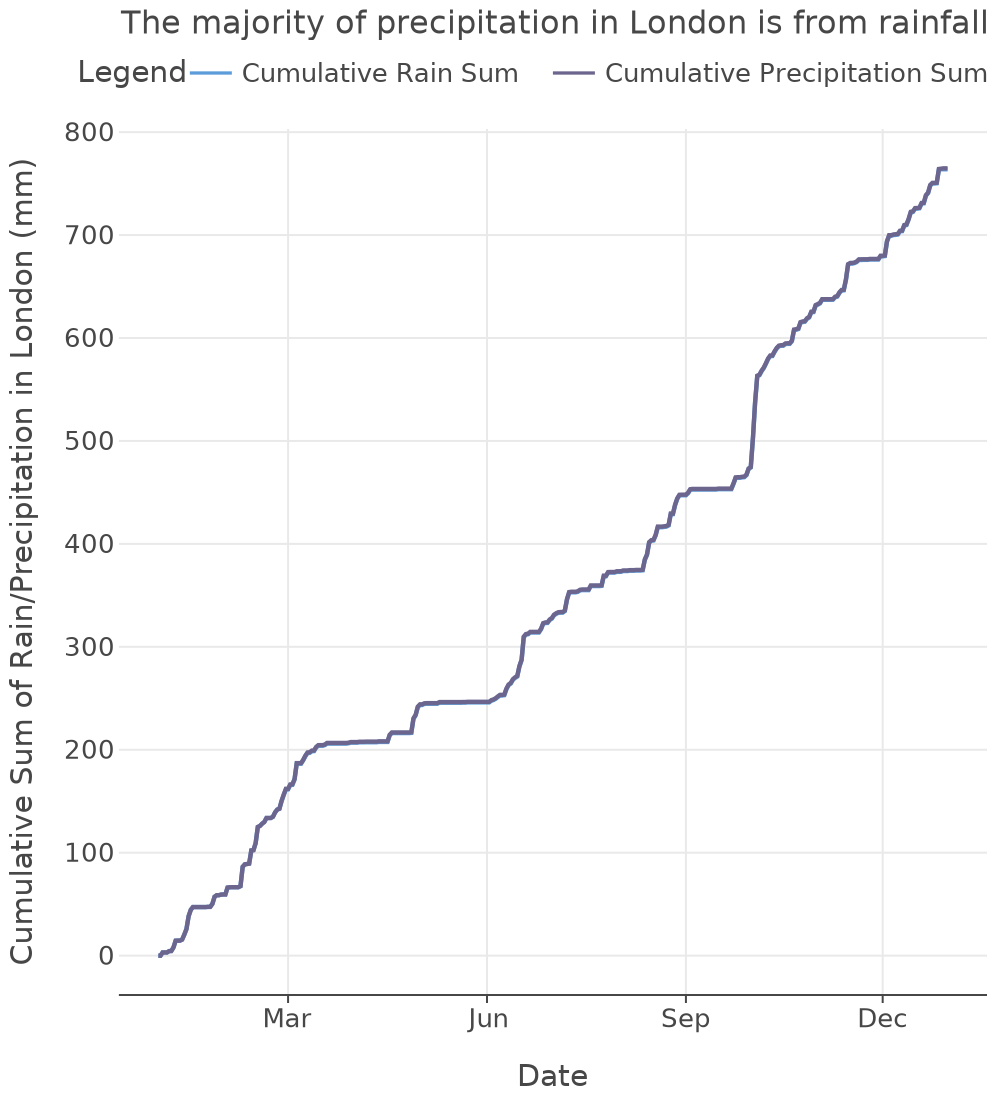

In [159]:
Image(filename='../figures/preciprain.png')

### Comparing the number of hours of precipitation 

In [147]:
# Selecting the relevant columns
precip_hrs = all_data[['City', 'Precipitation Hours', 'Year']]

# Grouping by city and year to get the sum of precipitation hours per year
annual_precip_hrs = precip_hrs.groupby(['City', 'Year'], as_index=False).agg(Annual_Precipitation_Hours=('Precipitation Hours', 'sum'))

# Calculating the mean annual precipitation hours by city
average_annual_precip_hrs = annual_precip_hrs.groupby('City', as_index=False).agg(Average_Annual_Precipitation_Hours=('Annual_Precipitation_Hours', 'mean'))

# Creating a bar chart to show the mean annual precipitation hours in each city
preciphrs = (
            ggplot(average_annual_precip_hrs, aes(x='City', y='Average_Annual_Precipitation_Hours')) + \
                geom_bar(stat='identity', fill='#1F627D') + \
                ggsize(800,500) + \
                labs(title='London does not have a significant amount of hours of precipitation relative to other countries',
                    y='Average Annual Precipitation Hours',
                    x='City') + \
                theme(
                    plot_title=element_text(size=16, hjust=0.5)
                )
)
preciphrs

London ranks 8th in average hours of precipitation, suggesting that much of its rainfall is light, contributing to its lower standing in terms of overall rainfall volume. However, this position - 8th out of 11 cities - is relatively low, implying that London may not be as rainy as shown in the movies.



In [149]:
ggsave(preciphrs, filename='preciphrs.png', path='../figures')

'/files/ds105a-2024-w06-summative-rachel-andrsn/figures/preciphrs.png'

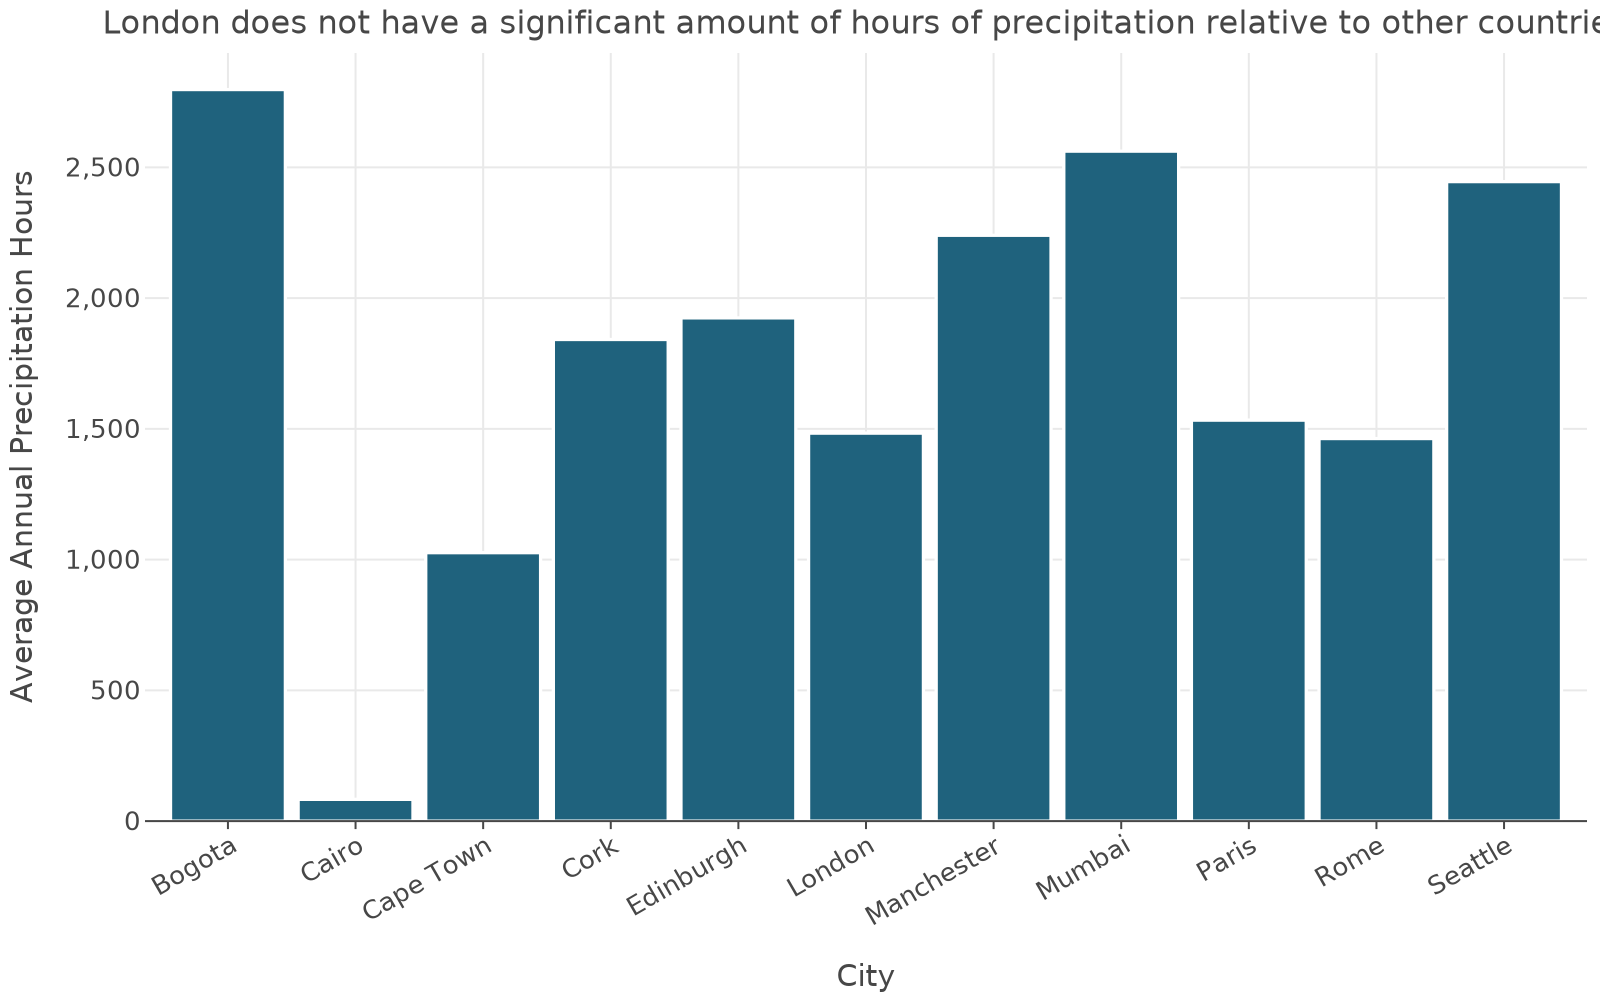

In [152]:
Image(filename='../figures/preciphrs.png') 

## Conclusion 

Overall, the data appears to suggest that London is not very rainy, in terms of either volume of rain or hours of rain, therein indicating that **London is not as rainy as the movies make it out to be**. 
Although, for a more robust conclusion, a greater number of cities could be investigated against a larger timeframe, as the cities chosen may be exceptionally rainy. 